In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [74]:
# all in nanoseconds
df = pd.concat([pd.read_csv(i) for i in glob.glob('results_*.csv')])

In [75]:
df = df.rename(columns=lambda x: x.strip())

In [76]:
df.set_index('Cells', inplace=True)


In [79]:
df.sort_index(inplace=True)

In [129]:
df['GPU, Unrolled JIT'] = [
    np.nan,
    np.nan,
    np.nan,
    116907662, #ns
]

df['GPU, Unrolled AOT'] = [
    np.nan,
    np.nan,
    np.nan,
    120809268,
]

df['GPU, JIT General'] = [
    np.nan,
    np.nan,
    np.nan,
    103161131,
]

df['GPU, AOT General'] = [
    np.nan,
    np.nan,
    np.nan,
    103095115,
]

In [102]:
df['Classic Speedup'] = df.Classic / df.Classic

df['Preprocessed Speedup'] = df.Classic / df.Preprocessed

df['General GPU Speedup'] = df.Classic / df['GPU General']
df['Reordered Memory General GPU Speedup'] = df.Classic / df['GPU reordered memory general']

df['Unrolled GPU Speedup'] = df.Classic / df['GPU JIT']
df['Reordered Memory General Unrolled GPU Speedup'] = df.Classic / df['GPU reordered memory JIT']

In [118]:
df

,Reactions,Species,Classic,Preprocessed,GPU JIT,GPU reordered memory JIT,GPU General,GPU reordered memory general,Preprocessed Speedup,General GPU Speedup,Reordered Memory General GPU Speedup,Unrolled GPU Speedup,Reordered Memory General Unrolled GPU Speedup,Classic Speedup
Cells,,,,,,,,,,,,,,
1000,500,200,5735423,2293393,1977161,387128,2407031,1438983,2.500846,2.382779,3.985748,2.900838,14.815314,1.0
10000,500,200,51297436,19411956,14242562,976520,15307525,2596640,2.642569,3.351125,19.755313,3.601700,52.530861,1.0
100000,500,200,512723041,200813354,161845852,9882438,256737979,10607378,2.553232,1.997067,48.336454,3.167971,51.882242,1.0
1000000,500,200,5118805754,2022871174,1548540894,119499671,2590267470,103361345,2.530466,1.976169,49.523405,3.305567,42.835313,1.0


In [103]:
speedup_cols = ['Classic Speedup', 'Preprocessed Speedup','General GPU Speedup', 'Reordered Memory General GPU Speedup','Unrolled GPU Speedup','Reordered Memory General Unrolled GPU Speedup']

In [117]:
df[speedup_cols]

,Classic Speedup,Preprocessed Speedup,General GPU Speedup,Reordered Memory General GPU Speedup,Unrolled GPU Speedup,Reordered Memory General Unrolled GPU Speedup
Cells,,,,,,
1000,1.0,2.500846,2.382779,3.985748,2.900838,14.815314
10000,1.0,2.642569,3.351125,19.755313,3.601700,52.530861
100000,1.0,2.553232,1.997067,48.336454,3.167971,51.882242
1000000,1.0,2.530466,1.976169,49.523405,3.305567,42.835313


In [104]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
              '#f781bf', '#a65628', '#984ea3',
              '#999999', '#e41a1c', '#dede00']

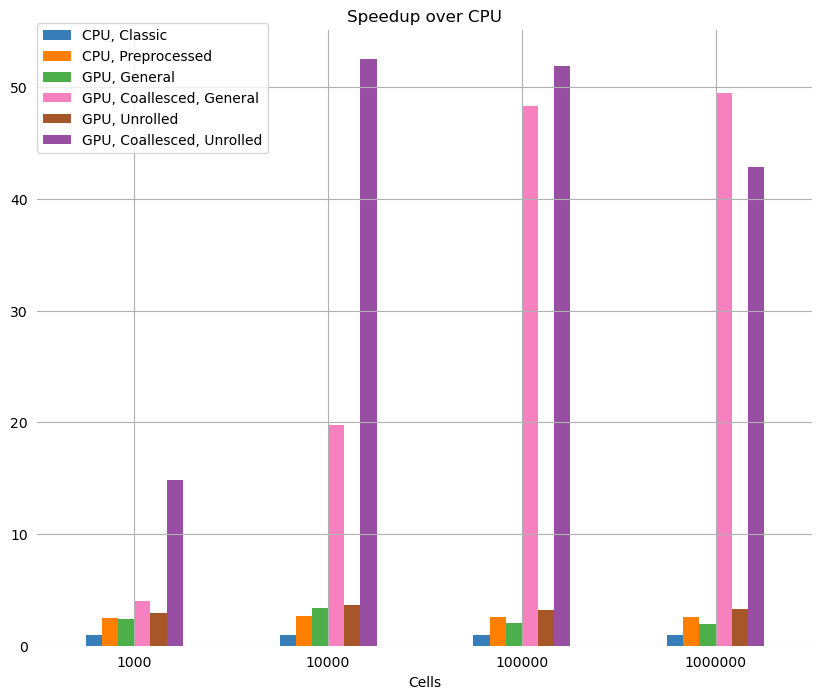

In [107]:
fig, ax = plt.subplots(figsize=(10,8))

df[speedup_cols].plot.bar(ax=ax, color = colors, legend=False)

ax.spines[:].set_visible(False)
ax.grid()
ax.tick_params(width=0, which='both')
ax.tick_params(rotation=0, axis='x')
ax.set_title('Speedup over CPU')

ax.legend(
    ['CPU, Classic', 'CPU, Preprocessed', 'GPU, General', 'GPU, Coallesced, General', 'GPU, Unrolled', 'GPU, Coallesced, Unrolled']
, loc = (0.0, 0.8))

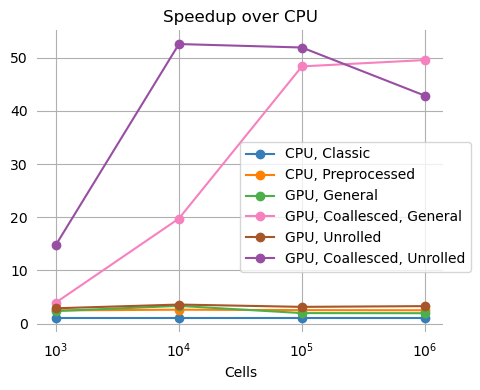

In [128]:
fig, ax = plt.subplots(figsize=(5,4))

df[speedup_cols].plot(ax=ax, color = colors, legend=False, marker='o')

ax.spines[:].set_visible(False)
ax.grid()
ax.tick_params(width=0, which='both')
ax.set_title('Speedup over CPU')

ax.set_xscale('log')

ax.legend(
    ['CPU, Classic', 'CPU, Preprocessed', 'GPU, General', 'GPU, Coallesced, General', 'GPU, Unrolled', 'GPU, Coallesced, Unrolled']
, loc = (0.5, 0.2))
fig.tight_layout()

In [133]:
cols = ['GPU, Unrolled JIT', 'GPU, Unrolled AOT', 'GPU, JIT General',
       'GPU, AOT General']

Text(0, 0.5, 'Time (ns)')

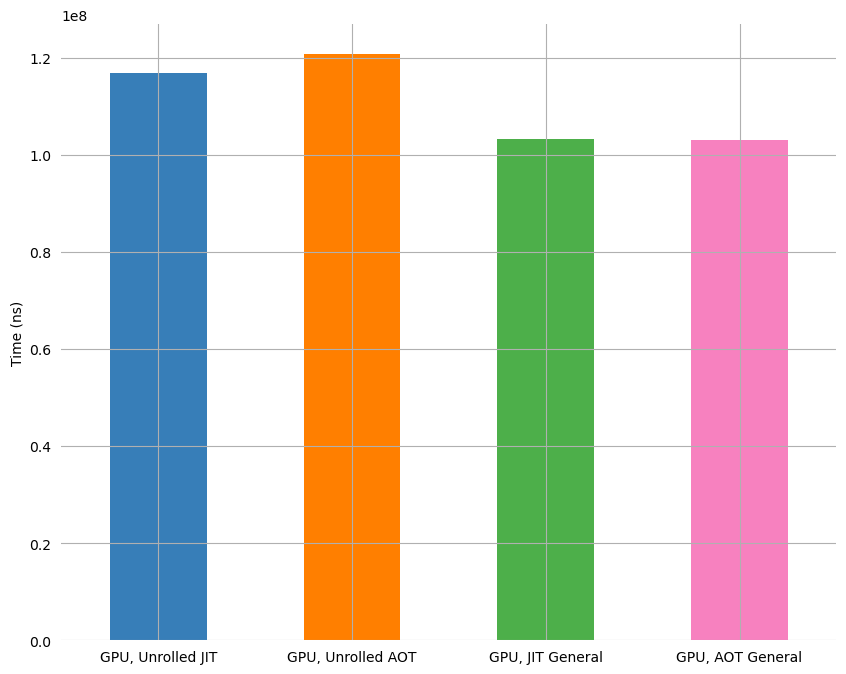

In [136]:
fig, ax = plt.subplots(figsize=(10,8))

df.loc[1000000][cols].plot.bar(ax=ax, color = colors, legend=False)

ax.spines[:].set_visible(False)
ax.grid()
ax.tick_params(width=0, which='both')
ax.tick_params(rotation=0, axis='x')
ax.set_ylabel('Time (ns)')

# ax.legend(
#     ['CPU, Classic', 'CPU, Preprocessed', 'GPU, General', 'GPU, Coallesced, General', 'GPU, Unrolled', 'GPU, Coallesced, Unrolled']
# , loc = (0.0, 0.8))